# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [2]:
# Import the data
df = pd.read_csv("foodhub-order.csv")

# First few rows of the data
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### **Question 1:** How many rows and columns are present in the data?

In [3]:
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 1898
Number of Columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [6]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


* Minimum food preparation time: 20 minutes
* Average food preparation time: 27 minutes
* Maximum food preparation time: 35 minutes

### **Question 5:** How many orders are not rated? 

In [7]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

#### Customer ID

<Figure size 1200x500 with 0 Axes>

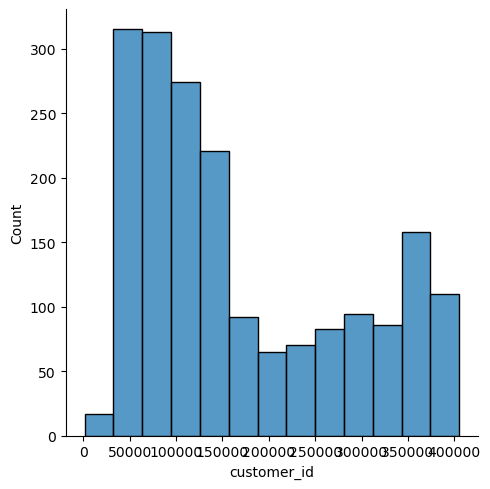

In [38]:
plt.figure(figsize=(12,5))
sns.displot(df, x="customer_id")
plt.show()

#### Restaurant name

In [9]:
# Value counts of the restaurants
category_counts = df['restaurant_name'].value_counts()

print(category_counts)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


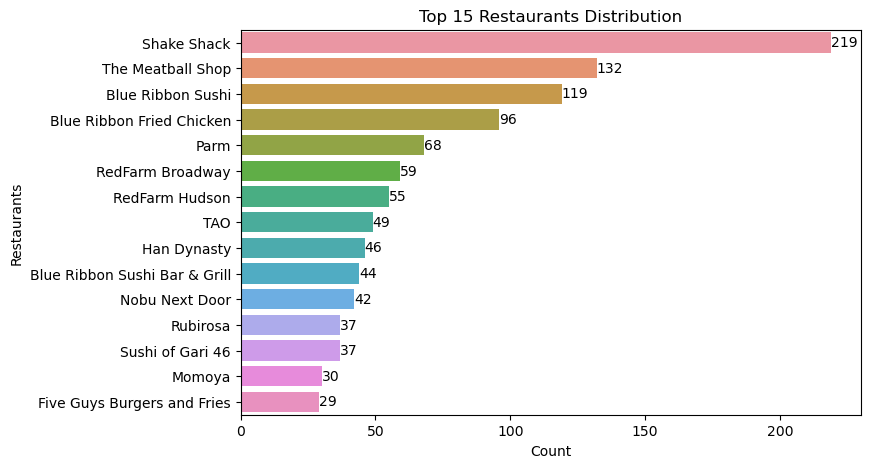

In [46]:
'''I will be visualizing the top 15 since we have 178 restaurants'''

# Specify the number of top categories to display
top_n = 15

# Select the top N categories by value count
top_categories = category_counts[:top_n]

# Create the horizontal bar plot
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=top_categories.values, y=top_categories.index)

# Set the plot title and axis labels
plt.title(f'Top {top_n} Restaurants Distribution')
plt.xlabel('Count')
plt.ylabel('Restaurants')

# Add values to the bars
for i, count in enumerate(top_categories.values):
    bars.text(count, i, str(count), ha='left', va='center', color='black')

# Display the plot
plt.show()


#### Cuisine type

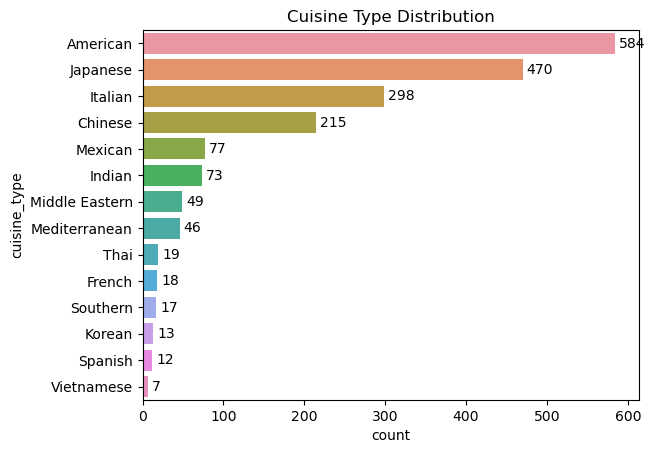

In [12]:
# Get the value counts for the 'cuisine_type' column
cuisine_type_counts = df['cuisine_type'].value_counts()

# Sort the unique values and their counts in descending order
order = cuisine_type_counts.sort_values(ascending=False).index

ax = sns.countplot(y=df["cuisine_type"], order=order)
for patch in ax.patches:
        ax.text(patch.get_width() + 5, patch.get_y() + patch.get_height() / 2, '{:.0f}'.format(patch.get_width()), ha='left', va='center')
plt.title('Cuisine Type Distribution')
plt.show()

#### Cost of the order

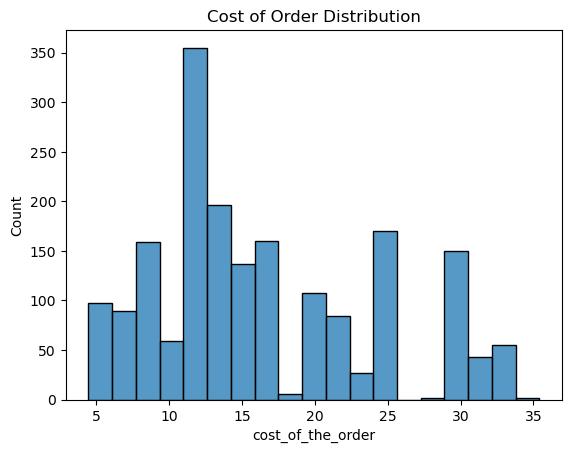

In [13]:
sns.histplot(x=df['cost_of_the_order'])
plt.title('Cost of Order Distribution')
plt.show()

#### Day of the week

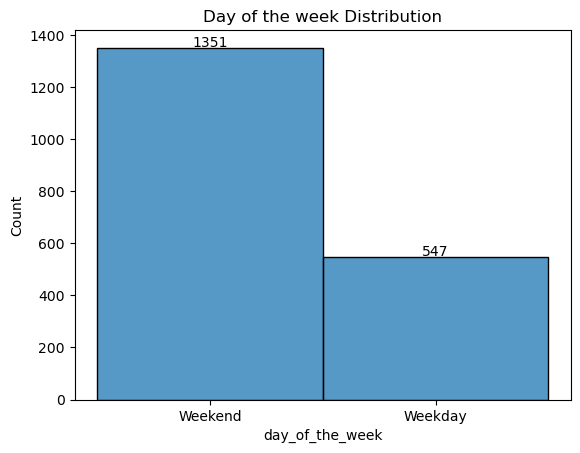

In [14]:
ax = sns.histplot(x=df['day_of_the_week'])
for patch in ax.patches:
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, '{:.0f}'.format(patch.get_height()), ha='center')
plt.title('Day of the week Distribution')
plt.show()

#### Rating

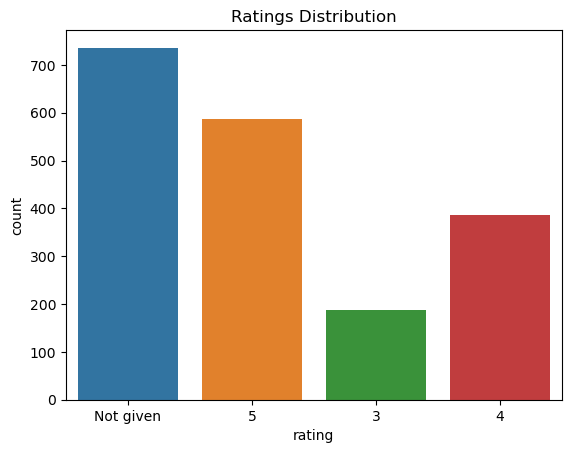

In [15]:
sns.countplot(x=df.rating)
plt.title('Ratings Distribution')
plt.show()

#### Food Preparation time

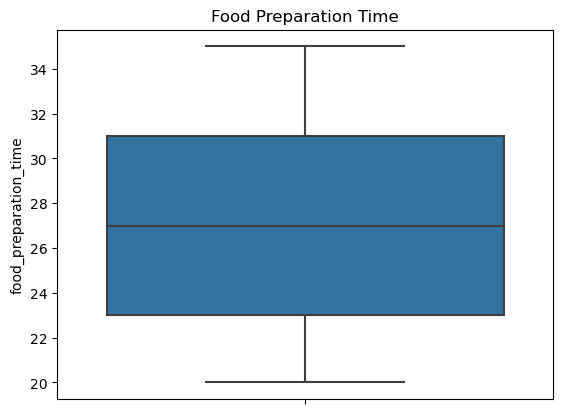

In [16]:
sns.boxplot(y=df.food_preparation_time)
plt.title('Food Preparation Time')
plt.show()

#### Delivery time

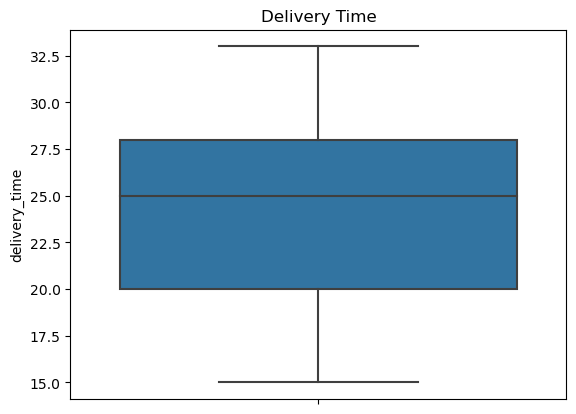

In [17]:
sns.boxplot(y=df.delivery_time)
plt.title('Delivery Time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [18]:
# Group the data by restaurant name and calculate the sum of orders for each restaurant
restaurant_orders = df.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants based on the number of orders in descending order
top_restaurants = restaurant_orders.sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_restaurants.head(5)

# Display the top 5 restaurants
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


### **Question 8**: Which is the most popular cuisine on weekends?

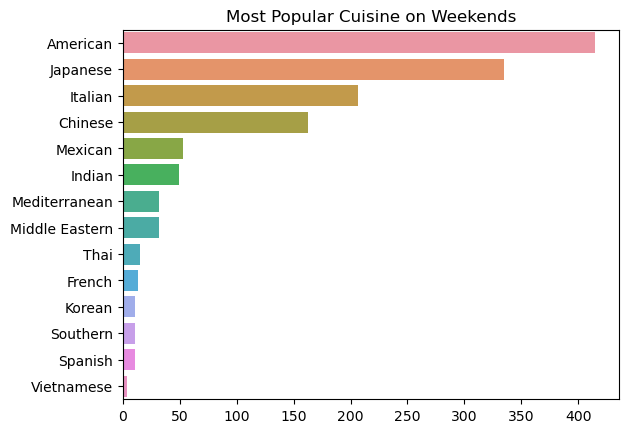

In [19]:
# filter for weekends
weekend_df = df[df['day_of_the_week'].isin(['Weekend'])]

# grouping by cuisine type and getting the value counts
cuisine = weekend_df['cuisine_type'].value_counts()

sns.barplot(y=cuisine.index, x=cuisine.values)
plt.title('Most Popular Cuisine on Weekends')
plt.show()

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [20]:
# Number of orders more than $20
more_20 = len(df[df['cost_of_the_order'] > 20])

# Total orders
total_orders = len(df)

# percentage of orders more than $20
more_20_perc = (more_20/total_orders)*100

print(f'Percentage of Orders more than $20: {round(more_20_perc, 2)}%')

Percentage of Orders more than $20: 29.24%


### **Question 10**: What is the mean order delivery time?

In [21]:
avg_delivery_time = df.delivery_time.mean()

print(f'Mean order delivery time: {avg_delivery_time:.2f} minutes')

Mean order delivery time: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [22]:
# Group the data by customer ID and calculate the number of orders
customers = df.groupby('customer_id')['order_id'].count()

# Sort the customers based on the number of orders in descending order
top_customers = customers.sort_values(ascending=False)

# Get the top 3 customers
top_3_customers = top_customers.head(3)

# Display the top 3 customers
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

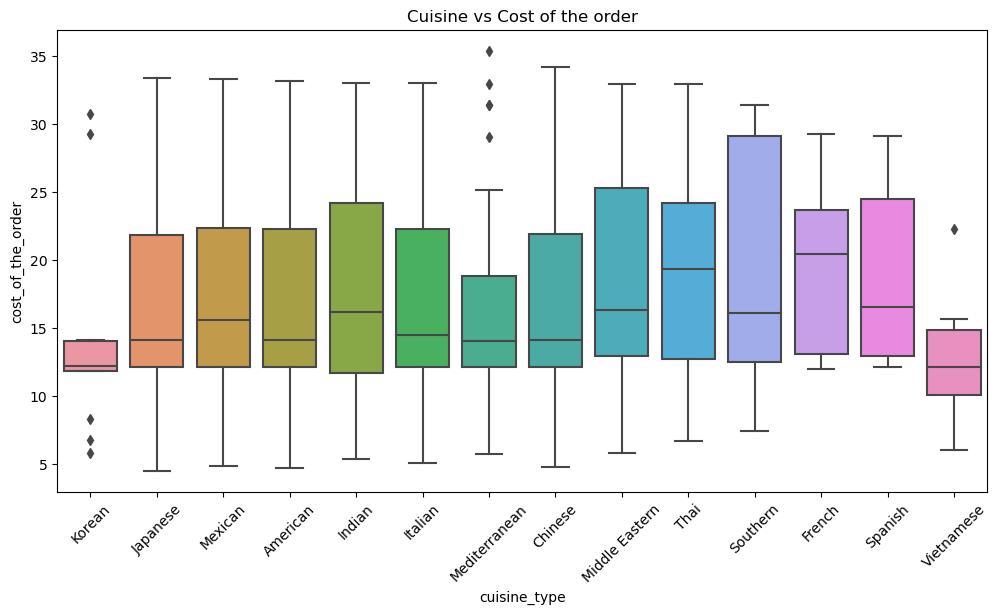

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cuisine vs Cost of the order')
plt.xticks(rotation=45)
plt.show()

#### Cuisine vs Food Preparation time

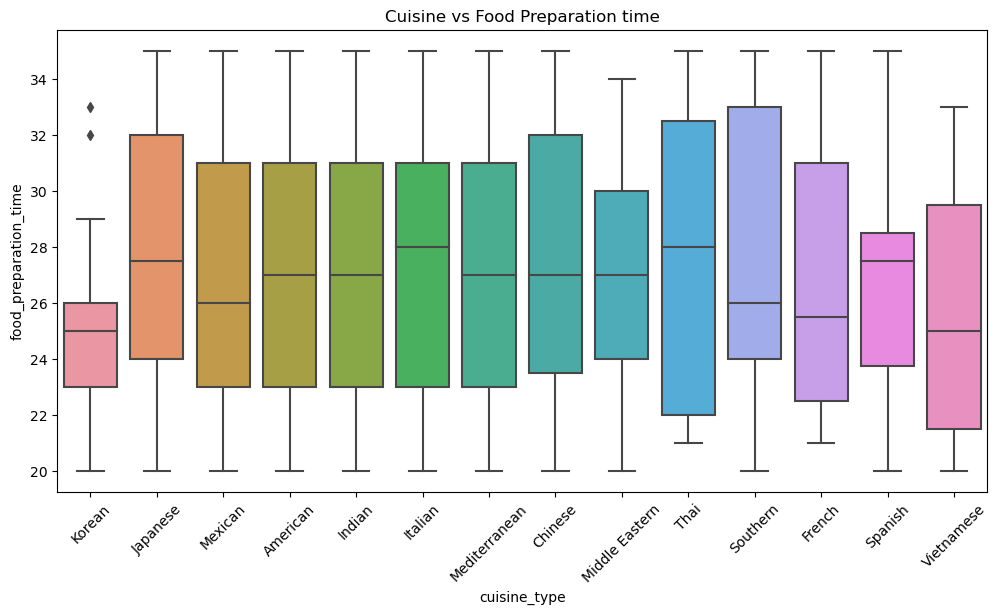

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Cuisine vs Food Preparation time')
plt.xticks(rotation=45)
plt.show()

#### Day of the Week vs Delivery time

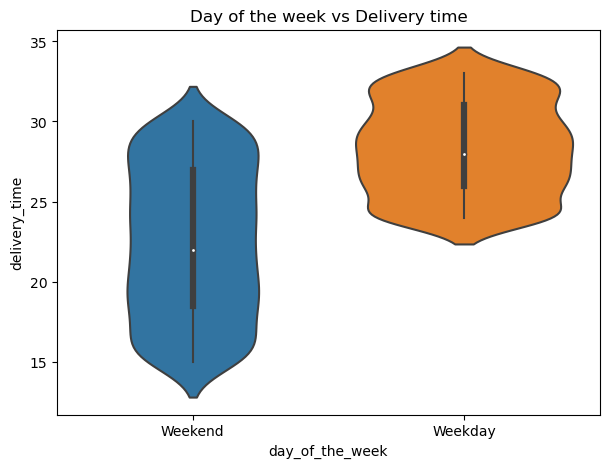

In [25]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Day of the week vs Delivery time')
plt.show()

#### Day of the Week vs Food Preparation time

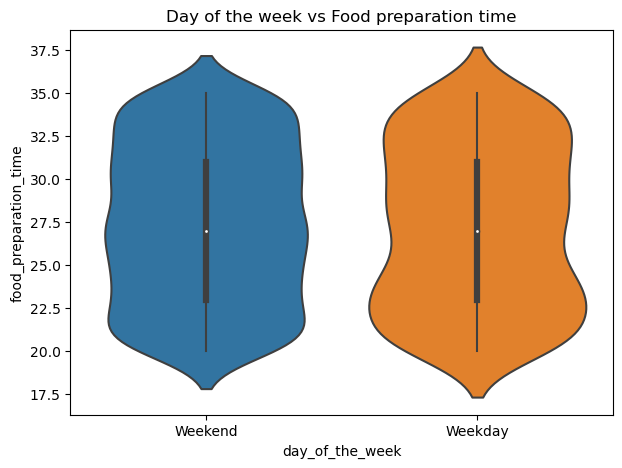

In [26]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.title('Day of the week vs Food preparation time')
plt.show()

#### Rating vs Delivery time

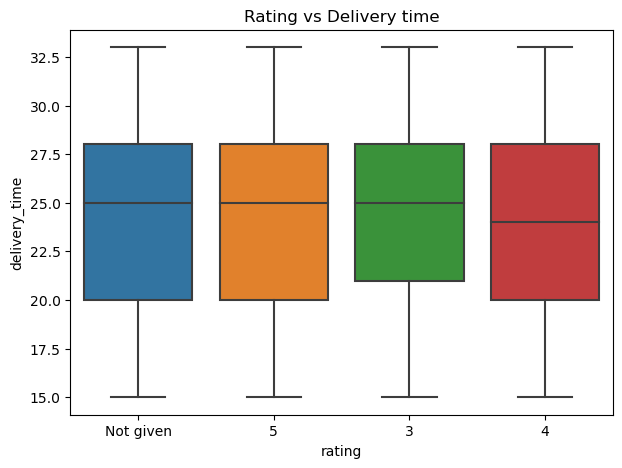

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.title('Rating vs Delivery time')
plt.show()

#### Rating vs Cost of the order

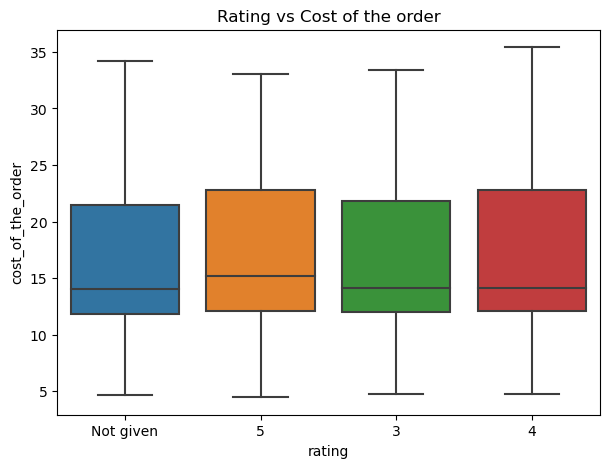

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Rating vs Cost of the order')
plt.show()

#### Correlation among variables

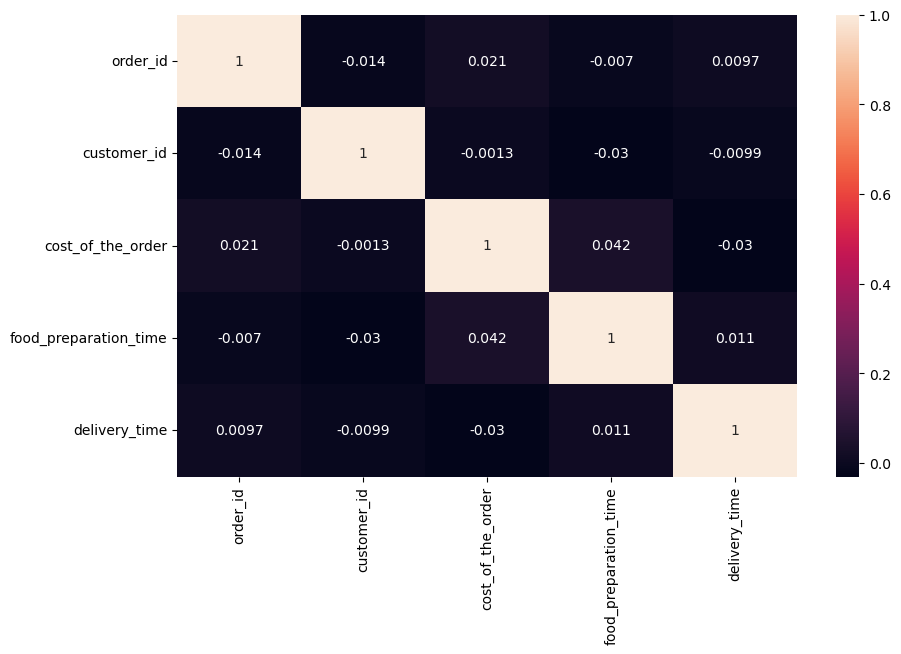

In [29]:
# Standard correlation coefficients of Numerical features

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [30]:
# A new df with restaurants that have more than 50 rating counts
restaurants_over50_ratings = df[df.groupby('restaurant_name')['rating'].transform('count') > 50]

# removing the "Not given" rating
restaurants_over50_ratings = restaurants_over50_ratings[restaurants_over50_ratings['rating'] != 'Not given']

# converting the rating column to float data type
restaurants_over50_ratings['rating'] = restaurants_over50_ratings['rating'].astype(float)

# creating a new column for the avg rating
restaurants_over50_ratings['avg_rating'] = restaurants_over50_ratings.groupby('restaurant_name')['rating'].transform('mean')

# Restaurants having average rating greater than 4
restaurants = restaurants_over50_ratings[restaurants_over50_ratings['avg_rating'] > 4]

print(restaurants['restaurant_name'].unique())

['Blue Ribbon Fried Chicken' 'Shake Shack' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'The Meatball Shop' 'Parm' 'RedFarm Broadway']


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [31]:
# Calculate the revenue for each order
revenue_mask_20 = df['cost_of_the_order'] > 20
revenue_mask_5 = (df['cost_of_the_order'] > 5) & ~revenue_mask_20

df.loc[revenue_mask_20, 'revenue'] = df.loc[revenue_mask_20, 'cost_of_the_order'] * 0.25
df.loc[revenue_mask_5, 'revenue'] = df.loc[revenue_mask_5, 'cost_of_the_order'] * 0.15
df['revenue'].fillna(0, inplace=True)

# Calculate the net revenue generated across all orders
net_revenue = df['revenue'].sum()

print(f"Net revenue generated by the company: ${net_revenue:.2f}")


Net revenue generated by the company: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [32]:
# calculating total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# orders that take more than 60 minutes
over_60mins_delivery = df['total_delivery_time'] > 60

#percentage of oerders that take more than 60 minutes
percentage = (over_60mins_delivery.sum() / len(df)) * 100

print(f'Percentage of orders that took more than 60 minutes: {percentage:.2f}%')

Percentage of orders that took more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [36]:
# weekend and weekdays df
weekend_orders = df[df.day_of_the_week == 'Weekend']
weekday_orders = df[df.day_of_the_week == 'Weekday']

avg_weekday_delivery = weekday_orders.delivery_time.mean()
avg_weekend_delivery = weekend_orders.delivery_time.mean()

#Result

print(f"Mean delivery time on weekdays: {avg_weekday_delivery:.2f} mins")
print(f"Mean delivery time on weekends: {avg_weekend_delivery:.2f} mins")

Mean delivery time on weekdays: 28.34 mins
Mean delivery time on weekends: 22.47 mins


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

__Conclusions__
* The top 15 restaurants (out of 178) accounts for 56% of all orders. This indicates that lots of the restaurants are performing poorly.
* The customers seems to favour the American, Japanese, Italian, and Chinese cuisines because they account for 82.5% of all orders.
* Even though weekend consists of just two days in a week, the orders during the weekend is 71%.
* Average delivery time is consistent with rating, i.e the delivery time does not affect ratings.

__Recommendations__

* Vietnamese cuisine orders are really low, the cuisine can be removed from the menu. It may also result in loss if the special ingredients required to prepare it are not used in time before spoilage.
* The amount of customers that did not give ratings are much, more awareness should be created for customers to rate the restaurants so as ti helpimprove their services.

